# **저번시간 복습**

## \*args, **kwargs

In [ ]:
# *의 목적은
# 1) 남은 요소를 모두 대입하기 위함

# 덧셈을 하는 함수를 만들었는데
def sum_def(*arg):
    return sum(arg)

sum_def(1,2,3,4,10,40,50)

# 2) 오류가 나지 않게 하기 위함

In [ ]:
# 변수 내에서 설명

# 남은 요소 대입 받기
# 언패킹 시, 좌변의 변수 중 하나에 별 기호(*)를 붙이면,
# 남은 요소 전체를 리스트에 담아 대입한다.

numbers = (1,2,3,4,5)

a, b, *rest = numbers
print(a, b, rest)
# 1 2 [3, 4, 5]

a, *rest, e = numbers
print(rest)
# [2, 3, 4]

# 받는애가 *을 달고 있으면 리스트로 받음
# 주는애가 *을 달고 있으면 언패킹된 데이터를 줌

1 2 [3, 4, 5]
[2, 3, 4]


## 패킹과 언패킹

In [ ]:
# 패킹 : 여러 개의 데이터를 컬렉션(리스트, 튜플, 딕셔너리)으로 묶여 변수에 대입
# 언패킹 : 컬렉션(리스트, 튜플, 딕셔너리) 속의 요소들을 여러 개의 편수에 나누어 대입

In [ ]:
def abc(a, b, c):
    print(a, b, c)

test = [1,2,3]  # 패킹
abc(*test)      # 언패킹 : 1 2 3 으로 떨어짐

1 2 3


In [ ]:
# 언패킹 시, 변수의 갯수와 요소의 갯수가 일치해야 한다.
# 불필요한 값을 언더바를 사용하여 생략할 수 있다.

numbers = [1,2,3,4,5]       # 패킹
a, _, _, d, e = numbers     # 언패킹
print(a, d, e)

1 4 5


## 위치 인자와 언패킹 사용하기

In [ ]:
print(10, 20, 30)

# 순서가 중요한 함수인 경웨는 위치 인자를 사용할 때 주의 해야 한다. (머신러닝, 딥러닝)

In [ ]:
x = [10, 20, 30]

print(x)    # [10, 20, 30]
print(*x)   # 10 20 30

[10, 20, 30]
10 20 30


In [ ]:
# 가변인자(*args) 만들기

def print_numbers(*args):   # 패킹 : 튜플 (1, 2, 3, 4) 로 받음
    print(args)
    for arg in args:
        print(arg)

print_numbers(1,2,3,4)

(1, 2, 3, 4)
1
2
3
4


In [ ]:
x = [10]
print_numbers(*x)

(10,)
10


In [ ]:
# 키워드인자(**kwargs) 사용하기 (딕셔너리 패킹)

def personal_info(**kwargs):
    print('이름: ', kwargs['name'])
    print('나이: ', kwargs['age'])
    print('주소: ', kwargs['address'])

personal_info(name = '서영',
              age = 20,
              address = '대구광역시')

이름:  서영
나이:  20
주소:  대구광역시


* 참고

In [ ]:
## 파이썬에서의 자료처리 순서 ##

#위치 인자 (non-default)
#위치 인자 (default)
#/ (위치 인자들 어딘가에 존재한다)
#위치 가변 인자 (*args)
#키워드 전용 인자 (기본값 유무는 상관 없다)
#키워드 전용 가변 인자 (**kwargs)

* 연습문제

In [ ]:
# 1

def addition(*args):
    return sum(args)

print(addition(3,4,5))

12


In [ ]:
def func(age, name = '아이유', *args, **kwargs):
    print(age, name)
    print(args)
    print(kwargs)

func(20, '정우성', '010', 'male', mobile = '010', address = 'seoul')

20 None
('010', 'male')
{'mobile': '010', 'address': 'seoul'}


# CSV 파일 다루기

## seoul.csv 파일 데이터 불러오기

In [ ]:
import csv

In [ ]:
def opencsv(filename):
    f = open(filename, 'r')
    reader = csv.reader(f)
    output = []
    for i in reader:
        output.append(i)
    return output

In [ ]:
total = opencsv('seoul.csv')
total

In [ ]:
# 상위 5개 파일 불러오기 
# R 프로그램 : head() 상위 5개 불러오기

for i in total[:5]:
    print(i)

['Gu', 'Korean', 'Foreigner', 'Senior']
['Total', '9,740,398', '285,529', '1,468,146']
['Jongrogu', '151,767', '11,093', '27,394']
['Jongru', '126,409', '10,254', '23,025']
['Yongsangu', '228,830', '16,159', '38,531']


## 문자열로 되어있는 숫자 데이터 처리

* 숫자 데이터의 다양한 형태
* 숫자가 아닌 문자가 포함된 문자열은 숫자로 변환이 어려움
* re.sub

In [ ]:
# 숫자에 ','가 있으면 숫자로 인식하지 못함
'''
9,740,398
1,500만원
5300
'''     # 다양한 형태로 되어 있음

i = '123'
float(i), int(i)

(123.0, 123)

In [ ]:
# 문자형을 실수형으로 바꿀 때, ','가 있으면 에러가 난다.
float('123,456')

ValueError: ignored

In [ ]:
# substring 사용 -> 슬라이싱

# sub -> 대체

import re

j = '123,456'
float(re.sub(',','',j)), int(re.sub(',','',j))     # sub(바꿔야하는거, 바꿀것, 데이터)

(123456.0, 123456)

* re.search 사용
* 정규표현식

In [ ]:
k = []
for j in i:
    if re.search('\d', j):  # 숫자와 매치, [0-9]와 동일한 표현식
        k.append(int(re.sub(',','',j)))
    else:
        k.append(j)

In [ ]:
# 만약, 문자와 숫자가 섞여 있다면?
# 데이터가 밀리는 경우는 부지기수.

p = ['123강남구', '456종로구', '11,093', '27,394']
k = []
for j in p:
    if re.search('[a-z가-힣]', j):
        k.append(j)
    else:
        k.append(float(re.sub(',','',j)))
        
k

['123강남구', '456종로구', 11093.0, 27394.0]

In [ ]:
p = ['강남구', '종로구', '11,093', '27,394']
k = []
for j in p:
    if re.search('[1-9]', j):   # 숫자가 있을 경우
        k.append(float(re.sub(',','',j)))
    else:
        k.append(j)
        
k

['강남구', '종로구', 11093.0, 27394.0]

In [ ]:
p = ['123강남구@@', '456종로구!!', '11,093', '27,394']
k = []
for j in p:
    if re.search('[a-z가-힣!@]', j):
        k.append(j)
    else:
        k.append(float(re.sub(',','',j)))
        
k

['123강남구@@', '456종로구!!', 11093.0, 27394.0]

In [ ]:
# 예외처리
# try - except

try:
    p = ['123강남구@@', '456종로구!!', '11,093', '27,394']
    k = []
    for j in p:
        if re.search('[1-9]', j):   # 숫자가 있을 경우
            k.append(float(re.sub(',','',j)))
        else:
            k.append(j)
except:
    print("오류 발생")
    pass

k

오류 발생


[]

In [ ]:
# 많은 데이터를 처리할 수 있는 함수 만들기

def switch(listname):
  for i in listname: #이중 리스트안에 있는 리스트 1개를 가져오고
    #['Jongrogu', 151,767, 11,093, 27,394]
    for j in i: #리스트에 있는 요소를 받아와서
      try: # 여기 해당되는건 바꾸고 (, 문자형을 숫자형으로)
        i[i.index(j)] = float(re.sub(',','',j))
      except: # 해당되지 않으면 바꾸지 말아라(숫자가 없는 문자형은 넘어가라)
        pass
  return listname

In [ ]:
sample = switch(total)
sample

[['Gu', 'Korean', 'Foreigner', 'Senior'],
 ['Total', 9740398.0, 285529.0, 1468146.0],
 ['Jongrogu', 151767.0, 11093.0, 27394.0],
 ['Jongru', 126409.0, 10254.0, 23025.0],
 ['Yongsangu', 228830.0, 16159.0, 38531.0],
 ['Seongdonggu', 303158.0, 8132.0, 43662.0],
 ['Kwangjingu', 352692.0, 15645.0, 47347.0],
 ['Dongdaemoongu', 346551.0, 17228.0, 58764.0],
 ['Jungranggu', 398812.0, 4964.0, 64449.0],
 ['Seongbukgu', 441590.0, 12524.0, 70204.0],
 ['Gangbukgu', 314090.0, 3785.0, 59808.0],
 ['Dobonggu', 335280.0, 2314.0, 58070.0],
 ['Nowonggu', 535282.0, 4547.0, 79968.0],
 ['Eunpyonggu', 481663.0, 4496.0, 79957.0],
 ['Seodaemungu', 310069.0, 14020.0, 51708.0],
 ['Mapogu', 373629.0, 11976.0, 51961.0],
 ['Yangcheongu', 459849.0, 4082.0, 60487.0],
 ['Gangseogu', 593708.0, 6532.0, 82937.0],
 ['Gurogu', 406748.0, 33102.0, 64952.0],
 ['Guemcheongu', 233371.0, 19497.0, 37191.0],
 ['Youngdeungpogu', 368402.0, 34076.0, 57350.0],
 ['Dongjakgu', 397618.0, 12869.0, 61607.0],
 ['Kwanakgu', 502117.0, 17836.0, 

## title 추가하기

In [ ]:
# 첫번째 행(제목 지정하기)

title = [['구', '한국인', '외국인', '외국인 비율(%)']]
i = ['Jongrogu', '151,767', '11,093', '27,394']
title.append([i[0], i[1], i[2], i[3]])
title

[['구', '한국인', '외국인', '외국인 비율(%)'], ['Jongrogu', '151,767', '11,093', '27,394']]

## seoul.csv 파일 응용하기

In [ ]:
# 반복작업 각 구의 외국인 비율 구하기
# 외국인 숫자 / 한국인 숫자 = 외국인 비율
# 100/1000 -> 0.1 * -> 10% 

for i in sample:
  foreign = 0
  try:
    foreign = round(i[2] / i[1] * 100, 1)
    print(i[0], foreign)
  except:
    pass

Total 2.9
Jongrogu 7.3
Jongru 8.1
Yongsangu 7.1
Seongdonggu 2.7
Kwangjingu 4.4
Dongdaemoongu 5.0
Jungranggu 1.2
Seongbukgu 2.8
Gangbukgu 1.2
Dobonggu 0.7
Nowonggu 0.8
Eunpyonggu 0.9
Seodaemungu 4.5
Mapogu 3.2
Yangcheongu 0.9
Gangseogu 1.1
Gurogu 8.1
Guemcheongu 8.4
Youngdeungpogu 9.2
Dongjakgu 3.2
Kwanakgu 3.6
Seoucheogu 1.0
Gangnamgu 0.9
Songpagu 1.0
Gangdonggu 1.0


In [ ]:
# 외국인 비율 3% 이상인 대상만 추출
# 문제 풀이 

for i in sample:
  foreign = 0
  try:
    foreign = round(i[2] / i[1] * 100, 1)
    if foreign >= 3:
        print(i[0], foreign)
  except:
    pass

Jongrogu 7.3
Jongru 8.1
Yongsangu 7.1
Kwangjingu 4.4
Dongdaemoongu 5.0
Seodaemungu 4.5
Mapogu 3.2
Gurogu 8.1
Guemcheongu 8.4
Youngdeungpogu 9.2
Dongjakgu 3.2
Kwanakgu 3.6


In [ ]:
# 새로운 CSV 파일 생성 : 외국인 비율 3% 이상인 것만
new_file = [['행정구역', '한국인', '외국인', '외국인 비율(%)']]

for i in sample:
  foreign = 0
  try:
    foreign = round(i[2] / i[1] * 100, 1)
    if foreign >= 3:
        new_file.append([i[0], [1], i[2], foreign])
  except:
    pass

new_file

[['행정구역', '한국인', '외국인', '외국인 비율(%)'],
 ['Jongrogu', [1], 11093.0, 7.3],
 ['Jongru', [1], 10254.0, 8.1],
 ['Yongsangu', [1], 16159.0, 7.1],
 ['Kwangjingu', [1], 15645.0, 4.4],
 ['Dongdaemoongu', [1], 17228.0, 5.0],
 ['Seodaemungu', [1], 14020.0, 4.5],
 ['Mapogu', [1], 11976.0, 3.2],
 ['Gurogu', [1], 33102.0, 8.1],
 ['Guemcheongu', [1], 19497.0, 8.4],
 ['Youngdeungpogu', [1], 34076.0, 9.2],
 ['Dongjakgu', [1], 12869.0, 3.2],
 ['Kwanakgu', [1], 17836.0, 3.6]]

In [ ]:
def writecsv(filename, list):
    with open(filename, 'w', newline = '') as f:
        a = csv.writer(f, delimiter = ',')
        a.writerows(list)

writecsv('seoul_new.csv', new_file)

## 부동산 데이터 응용하기

In [ ]:
# 데이터 불러오기

apt = switch(opencsv('data_school_utf8.csv'))
apt

[['\ufeff\ufeff시군구',
  '번지',
  '본번',
  '부번',
  '단지명',
  '전용면적(㎡)',
  '계약년월',
  '계약일',
  '거래금액(만원)',
  '층',
  '건축년도',
  '도로명',
  '해제사유발생일',
  '거래유형',
  '중개사소재지'],
 ['강원도 강릉시 견소동',
  202.0,
  202.0,
  0.0,
  '송정한신',
  59.8,
  202304.0,
  3.0,
  19000.0,
  14.0,
  1997.0,
  '경강로2539번길 8',
  '',
  '중개거래',
  '강원 강릉시'],
 ['강원도 강릉시 견소동',
  202.0,
  202.0,
  0.0,
  '송정한신',
  84.93,
  202304.0,
  11.0,
  25500.0,
  6.0,
  1997.0,
  '경강로2539번길 8',
  '',
  '중개거래',
  '강원 강릉시'],
 ['강원도 강릉시 견소동',
  202.0,
  202.0,
  0.0,
  '송정한신',
  84.93,
  202304.0,
  21.0,
  26400.0,
  7.0,
  1997.0,
  '경강로2539번길 8',
  '',
  '중개거래',
  '강원 강릉시'],
 ['강원도 강릉시 견소동',
  202.0,
  202.0,
  0.0,
  '송정한신',
  59.8,
  202304.0,
  25.0,
  19500.0,
  15.0,
  1997.0,
  '경강로2539번길 8',
  '',
  '중개거래',
  '강원 강릉시'],
 ['강원도 강릉시 교동',
  1984.0,
  1984.0,
  0.0,
  '강릉교동풍림아이원아파트',
  84.9964,
  202304.0,
  24.0,
  36300.0,
  3.0,
  2017.0,
  '화부산로40번길 29',
  '',
  '중개거래',
  '강원 강릉시'],
 ['강원도 강릉시 교동',
  1750.0,
  1750.0,
  0.0,
  '교동1주공',

In [ ]:
apt[:2]

[['\ufeff\ufeff시군구',
  '번지',
  '본번',
  '부번',
  '단지명',
  '전용면적(㎡)',
  '계약년월',
  '계약일',
  '거래금액(만원)',
  '층',
  '건축년도',
  '도로명',
  '해제사유발생일',
  '거래유형',
  '중개사소재지'],
 ['강원도 강릉시 견소동',
  202.0,
  202.0,
  0.0,
  '송정한신',
  59.8,
  202304.0,
  3.0,
  19000.0,
  14.0,
  1997.0,
  '경강로2539번길 8',
  '',
  '중개거래',
  '강원 강릉시']]

In [ ]:
# 처음 5개 데이터의 시/군/구만 출력

for i in apt[:6]:
    print(i[0])

﻿﻿시군구
강원도 강릉시 견소동
강원도 강릉시 견소동
강원도 강릉시 견소동
강원도 강릉시 견소동
강원도 강릉시 교동


In [ ]:
# 처음 5개 데이터의 거래가격(만원) 출력

for i in apt[:6]:
    print(i[0], i[5], i[8])

﻿﻿시군구 전용면적(㎡) 거래금액(만원)
강원도 강릉시 견소동 59.8 19000.0
강원도 강릉시 견소동 84.93 25500.0
강원도 강릉시 견소동 84.93 26400.0
강원도 강릉시 견소동 59.8 19500.0
강원도 강릉시 교동 84.9964 36300.0


In [ ]:
# 강원도에 120㎡ 이상 3억원 이하 아파트 검색하기

for i in apt:
    try:
        if i[5] >= 120 and i[8] <= 30000 and re.match('강원', i[0]):
            print(i[0], i[5], i[8])
    except:
        pass

강원도 강릉시 포남동 136.14 30000.0
강원도 동해시 천곡동 123.48 14500.0
강원도 원주시 단구동 134.97 22500.0
강원도 원주시 태장동 127.11 15400.0
강원도 춘천시 석사동 134.34 30000.0
강원도 춘천시 우두동 122.13 29000.0
강원도 춘천시 후평동 135.0 27000.0


In [ ]:
# 내가 원하는 조건 넣어보기

for i in apt:
    try:
        if 40 <= i[5] <= 80 and i[8] <= 30000 and i[9] >= 10 and re.match('대구광역시 달서구', i[0]):
            print(i[0], i[5], i[8], i[9])
    except:
        pass

대구광역시 달서구 감삼동 59.988 25300.0 15.0
대구광역시 달서구 감삼동 59.988 24600.0 18.0
대구광역시 달서구 도원동 59.99 16700.0 11.0
대구광역시 달서구 도원동 59.76 12000.0 20.0
대구광역시 달서구 도원동 59.63 16200.0 19.0
대구광역시 달서구 도원동 59.76 13000.0 11.0
대구광역시 달서구 본리동 59.98 26800.0 16.0
대구광역시 달서구 본리동 59.98 27000.0 17.0
대구광역시 달서구 본리동 59.98 26100.0 10.0
대구광역시 달서구 상인동 59.88 13300.0 14.0
대구광역시 달서구 상인동 59.98 29200.0 14.0
대구광역시 달서구 상인동 59.94 18500.0 16.0
대구광역시 달서구 상인동 59.699 23000.0 18.0
대구광역시 달서구 상인동 59.96 12500.0 11.0
대구광역시 달서구 상인동 43.2 9500.0 13.0
대구광역시 달서구 상인동 59.97 25000.0 11.0
대구광역시 달서구 성당동 59.895 27200.0 13.0
대구광역시 달서구 송현동 59.99 23200.0 15.0
대구광역시 달서구 송현동 59.99 25000.0 15.0
대구광역시 달서구 신당동 49.44 12000.0 12.0
대구광역시 달서구 용산동 59.99 14000.0 11.0
대구광역시 달서구 용산동 59.67 15000.0 17.0
대구광역시 달서구 용산동 59.43 16700.0 14.0
대구광역시 달서구 용산동 59.97 17100.0 15.0
대구광역시 달서구 용산동 60.0 18000.0 12.0
대구광역시 달서구 용산동 60.0 18400.0 13.0
대구광역시 달서구 월성동 59.9694 28400.0 20.0
대구광역시 달서구 유천동 59.7326 30000.0 18.0
대구광역시 달서구 유천동 59.8653 24400.0 16.0
대구광역시 달서구 이곡동 59.99 18200.0 13.0
대구광역

In [ ]:
# 내가 원하는 조건 넣어보기
# CSV 파일로 내보내기

new_apt_list = [['\ufeff\ufeff시군구', '전용면적(㎡)', '거래금액(만원)', '층']]

for i in apt:
    try:
        if 40 <= i[5] <= 80 and i[8] <= 30000 and i[9] >= 10 and re.match('대구광역시 달서구', i[0]):
            new_apt_list.append([i[0], i[5], i[8], i[9]])
    except:
        pass

writecsv('new_apt_list.csv', new_apt_list)

## 평균기온 데이터 응용하기

In [ ]:
import csv
f = open('CSV_example2_data.csv')

data = csv.reader(f, delimiter = ',')

for row in data:
    print(row)
f.close()

['날짜', '지점', '평균기온', '최저기온', '최고기온']
['2023-04-08', '108', '8.8', '3.1', '14.9']
['2023-04-09', '108', '10.8', '3.5', '17.8']
['2023-04-10', '108', '13.2', '6.2', '19.1']
['2023-04-11', '108', '13.1', '9.2', '17.4']
['2023-04-12', '108', '10.1', '4.8', '15.3']
['2023-04-13', '108', '11.9', '5.1', '17.2']
['2023-04-14', '108', '16.2', '11.9', '21.3']
['2023-04-15', '108', '13.5', '9.3', '16.6']
['2023-04-16', '108', '10.8', '7.5', '16.1']
['2023-04-17', '108', '13.1', '6.8', '18.1']
['2023-04-18', '108', '14', '10.7', '18.4']
['2023-04-19', '108', '19.1', '11.5', '28.4']
['2023-04-20', '108', '15.8', '14.5', '18.9']
['2023-04-21', '108', '16.7', '11.4', '22.8']
['2023-04-22', '108', '16.9', '12.2', '22.5']
['2023-04-23', '108', '16.1', '10.7', '22.1']
['2023-04-24', '108', '15.8', '11.5', '21.3']
['2023-04-25', '108', '10.9', '9', '13.2']
['2023-04-26', '108', '10.2', '7.4', '13.5']
['2023-04-27', '108', '12.9', '5.1', '20']
['2023-04-28', '108', '15.7', '9', '21.3']
['2023-04-29', '108

* 1. 헤더의 정보를 빼고 출력

In [ ]:
# next() : 첫번째 데이터 행을 읽어오면서 데이터의 탐색위치를 다음행으로 이동시키는 명령어

import csv
f = open('CSV_example2_data.csv')
data = csv.reader(f)

header = next(data)
header

['날짜', '지점', '평균기온', '최저기온', '최고기온']

In [ ]:
for row in data:
    print(row)
f.close()

['2023-04-08', '108', '8.8', '3.1', '14.9']
['2023-04-09', '108', '10.8', '3.5', '17.8']
['2023-04-10', '108', '13.2', '6.2', '19.1']
['2023-04-11', '108', '13.1', '9.2', '17.4']
['2023-04-12', '108', '10.1', '4.8', '15.3']
['2023-04-13', '108', '11.9', '5.1', '17.2']
['2023-04-14', '108', '16.2', '11.9', '21.3']
['2023-04-15', '108', '13.5', '9.3', '16.6']
['2023-04-16', '108', '10.8', '7.5', '16.1']
['2023-04-17', '108', '13.1', '6.8', '18.1']
['2023-04-18', '108', '14', '10.7', '18.4']
['2023-04-19', '108', '19.1', '11.5', '28.4']
['2023-04-20', '108', '15.8', '14.5', '18.9']
['2023-04-21', '108', '16.7', '11.4', '22.8']
['2023-04-22', '108', '16.9', '12.2', '22.5']
['2023-04-23', '108', '16.1', '10.7', '22.1']
['2023-04-24', '108', '15.8', '11.5', '21.3']
['2023-04-25', '108', '10.9', '9', '13.2']
['2023-04-26', '108', '10.2', '7.4', '13.5']
['2023-04-27', '108', '12.9', '5.1', '20']
['2023-04-28', '108', '15.7', '9', '21.3']
['2023-04-29', '108', '13.2', '9.9', '15.8']
['2023-04-3

* 2. 가장 더웠던 날을 출력해보자!

In [ ]:
import csv
f = open('CSV_example2_data.csv')
data = csv.reader(f)

In [ ]:
header = next(data)
header

['날짜', '지점', '평균기온', '최저기온', '최고기온']

In [ ]:
max_temp = 0

for row in data:
    row[4] = float(row[4])

    if max_temp < row[4]:
        max_temp = row[4]
        max_date = row[0]

f.close()
max_date, max_temp

('2023-04-19', 28.4)

* 3. 가장 추었던 날은?

In [ ]:
import csv
f = open('CSV_example2_data.csv')
data = csv.reader(f)

In [ ]:
header = next(data)
header

['날짜', '지점', '평균기온', '최저기온', '최고기온']

In [ ]:
min_temp = 99

for row in data:
    row[4] = float(row[4])

    if min_temp > row[4]:
        min_temp = row[4]
        min_date = row[0]

f.close()
min_date, min_temp

('2023-04-25', 13.2)

## 시각화하기

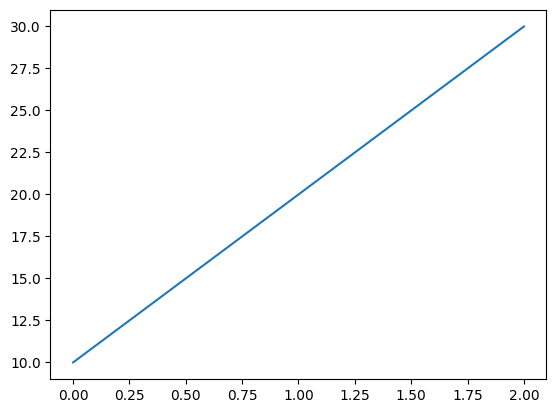

In [ ]:
import matplotlib.pyplot as plt
plt.plot([10, 20, 30])
plt.show()

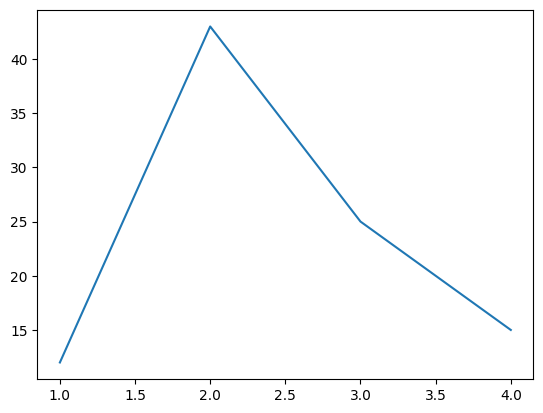

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [12,43,25,15])  # 첫번째 리스트는 x축, 두번째 리스트는 y축
plt.show()

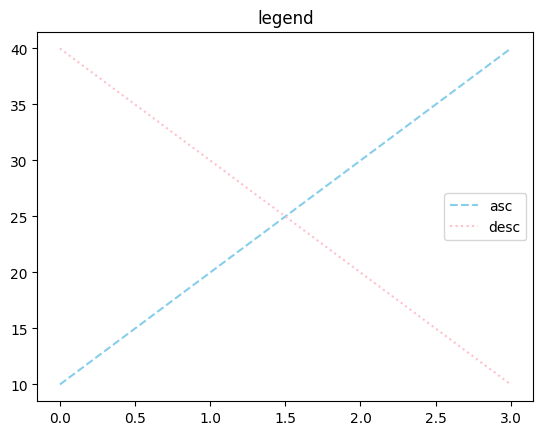

In [ ]:
import matplotlib.pyplot as plt
plt.title('legend')     # 그래프 제목
plt.plot([10,20,30,40], color = 'skyblue', linestyle = '--', label = 'asc')
plt.plot([40,30,20,10], 'pink', ls = ':', label = 'desc')   # color, linestyle, label 옵션주기
plt.legend()    # 범례표시 호출
plt.show()

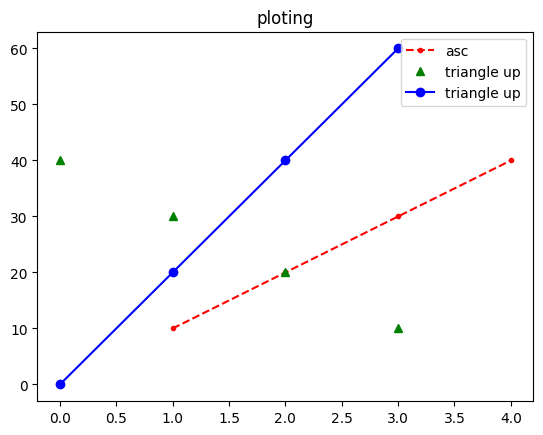

In [2]:
import matplotlib.pyplot as plt
plt.title('ploting') 
plt.plot([1,2,3,4], [10,20,30,40], 'r.--', label = 'asc')   # marker
plt.plot([40,30,20,10], 'g^', label = 'triangle up')
plt.plot([0,20,40,60], 'b-', marker='o', label = 'triangle up')
plt.legend()    # 범례 호출
plt.show()

* 인구수 데이터

In [ ]:
######## 추가 데이터

# 예제파일 1개 더 Import

test_dataset = open("example_4_each.csv")

# 년도 리스트
years = []
# 인구수 리스트
populations = []

for line in test_dataset: 
  (year, population) = line.split(',')
  if year != "구분":
    years.append(int(year))
    populations.append(int(population))

test_dataset.close()

print(years)
print(populations)

[1949, 1955, 1960, 1966, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
[1437670, 1568746, 2445402, 3793280, 5525262, 6879262, 8335616, 9625755, 10603250, 10217177, 9853972, 9762546, 9631482, 9643432, 9540443]


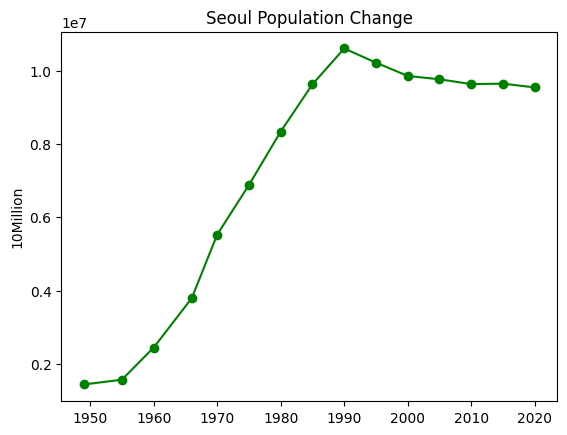

In [ ]:
#실습

# 그래프를 그릴 도화지 준비하기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# x축에 년도, y축에 인구수가 있는 선 그래프 만들기
plt.plot(years, populations, color='green', marker='o', linestyle='solid')

# 제목 더하기
plt.title("Seoul Population Change")

# y축에 레이블 추가하기
plt.ylabel("10Million")
plt.show()

* 평균기온 데이터

In [ ]:
# 최고 기온 데이터

# 가장 더웠던 날을 출력해보자!!
import csv
f = open('CSV_example2_data.csv')
data = csv.reader(f)
next(data)

result = []

for row in data:
  result.append(float(row[4]))
f.close()

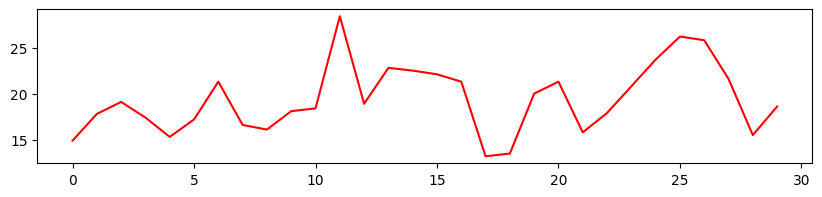

In [ ]:
plt.figure(figsize = (10,2))   # 가로길이 10, 세로길이 2
plt.plot(result, 'r')
plt.show()

In [ ]:
# 4월 5월 데이터를 비교하는 그래프

import csv
f = open('CSV_example2_data.csv')
data = csv.reader(f)
next(data)

result_04 = []
result_05 = []

for row in data:
    # 2023-04-19
    month = row[0].split('-')[1]
    if month == '04':
        result_04.append(float(row[4]))
    if month == '05':
        result_05.append(float(row[4]))
f.close()

print(result_04)
print(result_05)

[14.9, 17.8, 19.1, 17.4, 15.3, 17.2, 21.3, 16.6, 16.1, 18.1, 18.4, 28.4, 18.9, 22.8, 22.5, 22.1, 21.3, 13.2, 13.5, 20.0, 21.3, 15.8, 17.9]
[20.8, 23.7, 26.2, 25.8, 21.6, 15.5, 18.6]


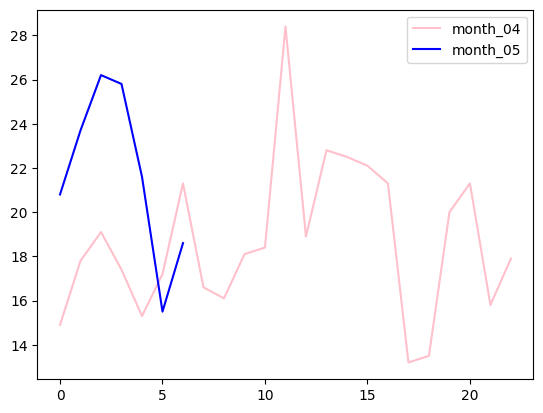

In [ ]:
plt.plot(result_04, 'pink', label = 'month_04')
plt.plot(result_05, 'blue', label = 'month_05')
plt.legend()
plt.show()